### 1.1 Data Overviews

> Name of dataset: USVideos (Mainly about trending youtube videos in US from 14.11.2017 -> 14.06.2018)

### 1.2 Attribute-information
>	video_id-Unique video id

>	trending_date-the date at which video start trending

>	title-Title of video

>	channel_title-video posted by channel

>	category_id-there are 32 Category value

>	publish_time-at what time video is uplaoded

>	tags-tag given to video

>	views-no of views

>	likes-no of likes

>	dislikes-no of dislikes

>	comment_count-no of comment

### 1.3 EDA

In [46]:
#import libraries
import pandas as pd
import numpy as np  
import json
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
data=pd.read_csv('USvideos.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


> Xử lí json để nhập vào thể loại video dựa trên id video

In [6]:
with open('US_category_id.json') as f:
    categories = json.load(f)['items']
category_name = {}
for category in categories:
    category_name[int(category['id'])] = category['snippet']['title']
data['category_name'] = data['category_id'].map(category_name)

In [7]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [8]:
# Thống kê giá trị độc nhất ở mỗi column
data.apply(lambda x: len(x.unique()))

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6902
category_name                16
dtype: int64

In [9]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


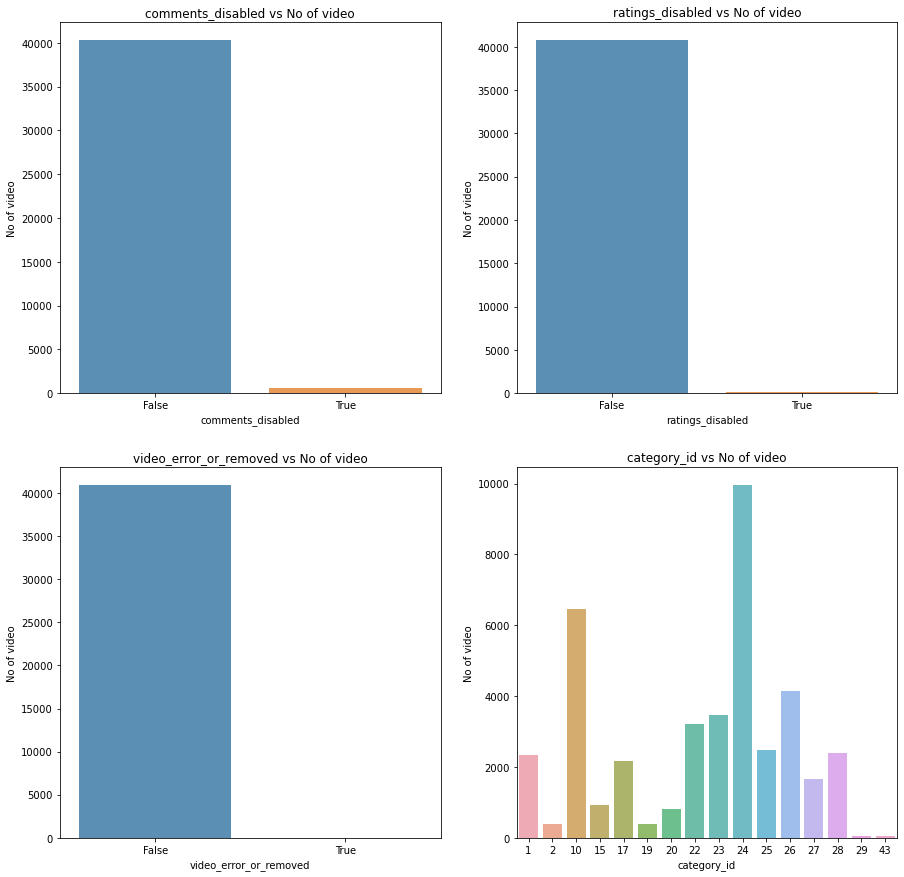

In [10]:
# Số lượng video bị tắt bình luận, đánh giá, số video bị xóa hoặc lỗi và số lượng video theo từng thể loại
i=1
fig=plt.figure(figsize=(15,15))
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
    count=data[x].value_counts()
    fig.add_subplot(2,2,i)
    sns.barplot(x=count.index, y=count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    i+=1
plt.show()

### 1.4 Feature Engineering

In [11]:
#No of tags
tags=[x.count("|")+1 for x in data["tags"]]
data["No_tags"]=tags

In [12]:
#length of title
title_len=[len(x) for x in data["title"]]
data["len_title"]=title_len

In [13]:
publish_time = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['publish_time'] = publish_time.dt.time
data['publish_date'] = publish_time.dt.date

#day at which video is publish
data['publish_weekday']=publish_time.dt.day_name()

In [14]:
#ratio of view/likes  upto 3 decimal
data["Ratio_View_likes"]=round(data["views"]/data["likes"],3)
#ratio of view/dislikes  upto 3 decimal
data["Ratio_View_dislikes"]=round(data["views"]/data["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
data["Ratio_views_comment_count"]=round(data["views"]/data["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
data["Ratio_likes_dislikes"]=round(data["likes"]/data["dislikes"],3)
#removing the infinite values
data=data.replace([np.inf, -np.inf], np.nan)
data=data.dropna(how='any',axis=0)

In [15]:
print(max(data["Ratio_View_likes"]))
print(max(data["Ratio_View_dislikes"]))
print(max(data["Ratio_views_comment_count"]))
print(max(data["Ratio_likes_dislikes"]))

14842.445
227286.0
1421762.0
1737.333


In [16]:
data['publish_weekday'] = data['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

5    6748
4    6746
2    6572
3    6519
1    5911
7    3530
6    3470
Name: publish_weekday, dtype: int64


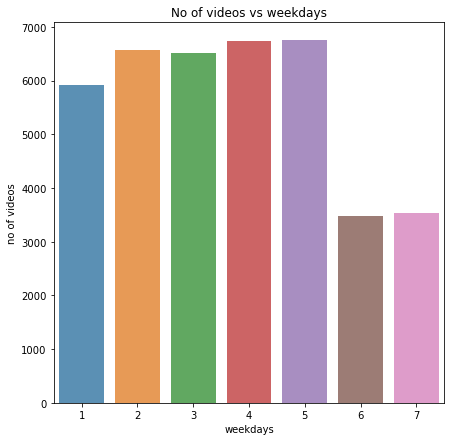

In [17]:
count=data["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

In [18]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,category_name,No_tags,len_title,publish_date,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1,34,2017-11-13,1,13.009,252.318,46.908,19.395
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,"One year after the presidential election, John...",Entertainment,4,62,2017-11-13,1,24.888,393.554,190.410,15.813
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,23,53,2017-11-12,7,21.854,597.759,390.103,27.352
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,Today we find out if Link is a Nickelback amat...,Entertainment,27,32,2017-11-13,1,33.737,515.267,159.911,15.273
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,I know it's been a while since we did this sho...,Entertainment,14,24,2017-11-12,7,15.849,1053.661,119.633,66.483


### 1.5 Correlation Matrix

> Sự tương quan giữa các dữ liệu views, likes, dislikes, comment_count

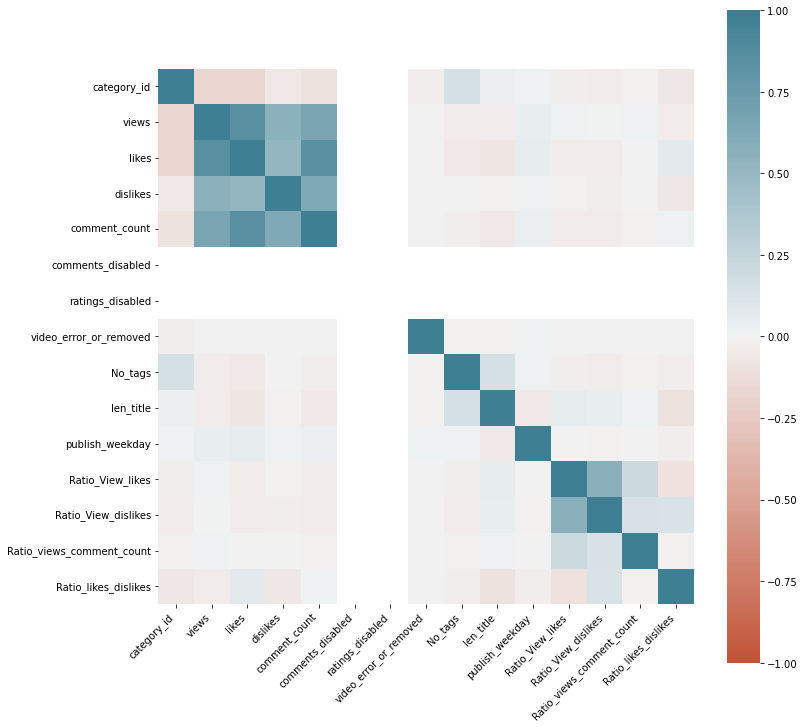

In [19]:
corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,category_name,No_tags,len_title,publish_date,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1,34,2017-11-13,1,13.009,252.318,46.908,19.395
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,"One year after the presidential election, John...",Entertainment,4,62,2017-11-13,1,24.888,393.554,190.410,15.813
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,23,53,2017-11-12,7,21.854,597.759,390.103,27.352
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,Today we find out if Link is a Nickelback amat...,Entertainment,27,32,2017-11-13,1,33.737,515.267,159.911,15.273
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,I know it's been a while since we did this sho...,Entertainment,14,24,2017-11-12,7,15.849,1053.661,119.633,66.483


In [21]:
### Removing non Correlated coloumns
data.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time','publish_date', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'category_name'], inplace = True ,axis = 1)
data.head()


,category_id,views,likes,dislikes,comment_count,No_tags,len_title,publish_weekday,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,22,748374,57527,2966,15954,1,34,1,13.009,252.318,46.908,19.395
1,24,2418783,97185,6146,12703,4,62,1,24.888,393.554,190.410,15.813
2,23,3191434,146033,5339,8181,23,53,7,21.854,597.759,390.103,27.352
3,24,343168,10172,666,2146,27,32,1,33.737,515.267,159.911,15.273
4,24,2095731,132235,1989,17518,14,24,7,15.849,1053.661,119.633,66.483


In [22]:
data.isnull().sum()

category_id                  0
views                        0
likes                        0
dislikes                     0
comment_count                0
No_tags                      0
len_title                    0
publish_weekday              0
Ratio_View_likes             0
Ratio_View_dislikes          0
Ratio_views_comment_count    0
Ratio_likes_dislikes         0
dtype: int64

#### Không có giá trị NaN nên không cần xử lý dữ liệu trống
#### Xử lí dữ liệu ngoại lệ 

In [23]:
# hàm vẽ histogram để nhận biết dạng phân bố
def histogram(data):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
    n_bins=30
    ax0.hist(data['views'], n_bins, density=True, histtype='bar')
    ax0.set_title('views')
    ax1.hist(data['likes'], n_bins, density=True, histtype='bar')
    ax1.set_title('likes')
    ax2.hist(data['dislikes'], n_bins, histtype='bar')
    ax2.set_title('dislikes')
    ax3.hist(data['comment_count'], n_bins, histtype='bar')
    ax3.set_title('comment_count')
    fig.tight_layout()
    plt.show()

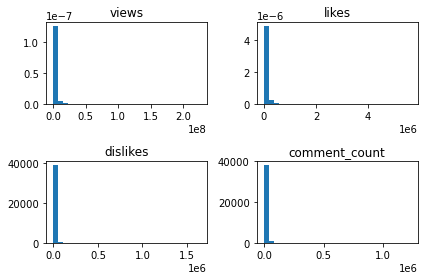

In [24]:
# vẽ dữ liệu cột views, likes, dislikes, comment_count và tiến hành xử lý ngoại lệ
histogram(data)

##### Dữ liệu của cột views, likes, dislikes, comment_count có dạng phân bố lệch (skewed) nên ta có: 
* ==> + Biên trên = 3rd Quantile + 3*IQR
* ==> + Biên dưới =  1st Quantile - 3*IQR
* IQR: Interquantile range
    * 3rd Quantile = Percentile 75
    * 1st Quantile = Percentile 25

In [25]:
# Xử lý ngoại lệ cho cột likes
IQR_likes = data['likes'].quantile(0.75) - data['likes'].quantile(0.25)  
ub_likes = data['likes'].quantile(0.75) + 3 * IQR_likes 
lb_likes = data['likes'].quantile(0.25) - 3 * IQR_likes 
print(ub_likes)
print(lb_likes)

208473.75
-145936.25


In [26]:
# Xử lý ngoại lệ cho cột dislikes
IQR_dislikes = data['dislikes'].quantile(0.75) - data['dislikes'].quantile(0.25)  
ub_dislikes = data['dislikes'].quantile(0.75) + 3 * IQR_dislikes
lb_dislikes = data['dislikes'].quantile(0.25) - 3 * IQR_dislikes
print(ub_dislikes)
print(lb_dislikes)

7190.0
-5018.0


In [27]:
# Xử lý ngoại lệ cho cột comment_count
IQR_comments = data['comment_count'].quantile(0.75) - data['comment_count'].quantile(0.25)  
ub_comments = data['comment_count'].quantile(0.75) + 3 * IQR_comments
lb_comments = data['comment_count'].quantile(0.25) - 3 * IQR_comments
print(ub_comments)
print(lb_comments)

21880.0
-15220.0


In [28]:
# Xử lý ngoại lệ cho cột views
IQR_views = data['views'].quantile(0.75) - data['views'].quantile(0.25)  
ub_views = data['views'].quantile(0.75) + 3 * IQR_views
lb_views = data['views'].quantile(0.25) - 3 * IQR_views
print(ub_views)
print(lb_views)

6595799.0
-4502354.5


In [29]:
# mang du lieu da qua xu li ngoai le
data_copy = data.copy()
# mang du lieu chua qua xu li ngoai le
data_copy_non_pr = data.copy()

In [30]:
# Xác định các giá trị biên trên và biên dưới của dữ liệu
# Thay thế giá trị ngoại lệ bằng 1 trong 2 giá trị trên
data_copy.loc[data_copy['views'] >= ub_views, 'views'] = ub_views
data_copy.loc[data_copy['likes'] >= ub_likes, 'likes'] = ub_likes
data_copy.loc[data_copy['dislikes'] >= ub_dislikes, 'dislikes'] = ub_dislikes
data_copy.loc[data_copy['comment_count'] >= ub_comments, 'comment_count'] = ub_comments

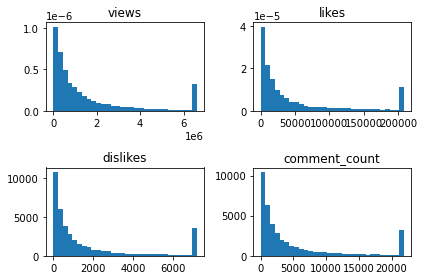

In [31]:
histogram(data_copy)

## Machine Learning Models

In [32]:
def lmploting_(SK):
    lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
    fig1 = lm1.fig 
    fig1.suptitle("Sklearn ", fontsize=18)
    sns.set(font_scale = 1.5)

#### View Prediction

In [33]:
data_drop_view=data_copy.drop(['views'],axis=1,inplace=False)
data_non_pr_drop_view=data_copy_non_pr.drop(['views'],axis=1,inplace=False)

In [34]:
handle_accuracy = []
non_handle_accuracy = []

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
model = LinearRegression()
data_drop_view = scaler.fit_transform(data_drop_view)
for random_state in range(10):
    # 1 la da duoc xu li
    # 2 la chua duoc xu li
    train1,test1,y_train1,y_test1=train_test_split(data_drop_view,data_copy['views'], test_size=0.2, random_state=random_state)
    train2,test2,y_train2,y_test2=train_test_split(data_non_pr_drop_view,data_copy_non_pr['views'], test_size=0.2,random_state=random_state)
    model.fit(train1, y_train1) 
    y_pred1 = model.predict(test1)
    model.fit(train2, y_train2) 
    y_pred2 = model.predict(test2)
    handle_accuracy.append(r2_score(y_test1, y_pred1))
    non_handle_accuracy.append(r2_score(y_test2, y_pred2))

       True Labels  Predicted Labels
252         210393     -6.098927e+04
6336         91026      4.312244e+05
10071       219673      2.880152e+05
10937       533496      7.502039e+05
4006        204293      1.295847e+06
...            ...               ...
17880      2058386      5.713066e+05
20750        34284      1.043193e+06
20780      1341134     -3.970278e+06
15639       125194      6.961660e+05
13250        34947      5.941614e+05

[7900 rows x 2 columns]


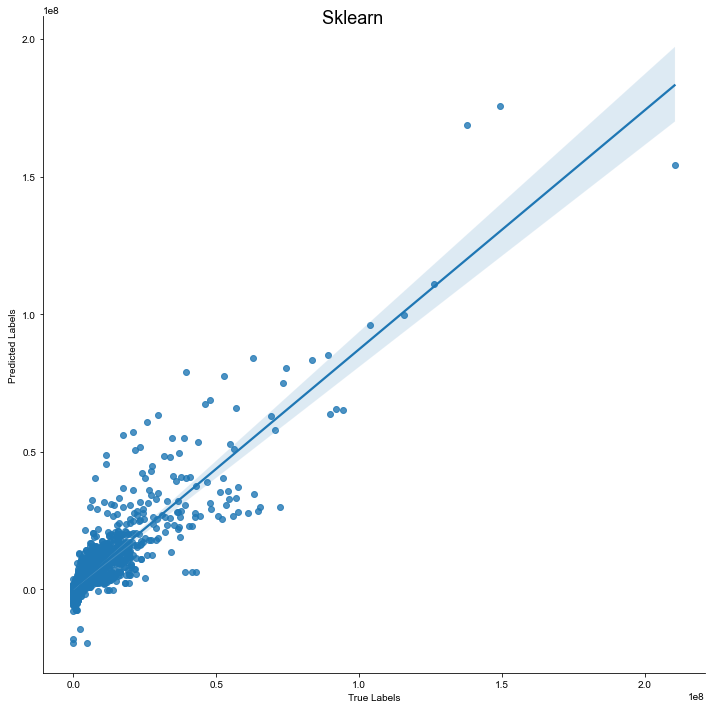

In [36]:
d1 = {'True Labels': y_test2, 'Predicted Labels': y_pred2}
SK = pd.DataFrame(data = d1)
print(SK)
lmploting_(SK)

In [37]:
print("Accuracy: ", round(mean(non_handle_accuracy),6))
print("Accuracy after handle exception: ", round(mean(handle_accuracy),6))

Accuracy:  0.799121
Accuracy after handle exception:  0.817908


> Nhận xét:
###### Feature engineering làm tăng tỉ lệ chính xác từ 78% -> 80%, thông qua các thuộc tính được biến đổi dựa trên heatmap ta thấy sự tương quan nhất định
###### Việc xử lí ngoại lệ outliers và chuẩn hóa dữ liệu làm tăng hiệu của thuật toán LinearRegression từ 80% -> 81% 

#### Likes prediction

In [38]:
likes=data['likes']
youtube_like=data.drop(['likes'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(youtube_like,likes, test_size=0.2,shuffle=False)

Root means score 107645.76207584131
Variance score: 0.92
Result : 0.9225662618022558
       True Labels  Predicted Labels
32824         6593      15211.108023
32825       118895      68101.241715
32826         7037      16592.826294
32827        33839      23124.949517
32828        40577      89729.579666
...            ...               ...
40943       645888     421612.605474
40944        38160      50341.214730
40946        48068      31260.377015
40947       192957     179076.879912
40948       357079     397785.193459

[7900 rows x 2 columns]


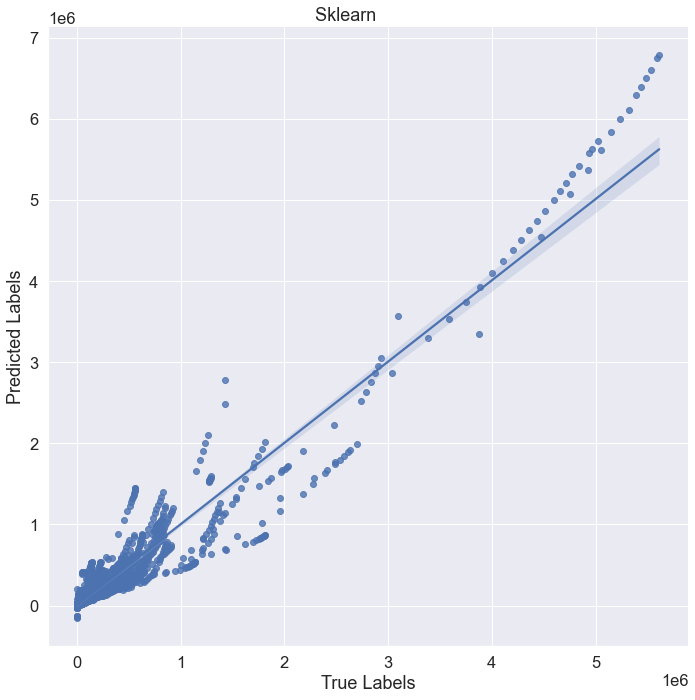

In [39]:
model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)
lmploting_(SK)

#### Comment Prediction

In [40]:
comment_count=data['comment_count']
youtube_comment=data.drop(['comment_count'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(youtube_comment,comment_count, test_size=0.2,shuffle=False)

Root means score 24765.152377610226
Variance score: 0.82
Result : 0.8159100926205115
       True Labels  Predicted Labels
32824          472       -193.142708
32825         8598      15019.649228
32826          425        224.728066
32827         2827       5006.043289
32828         5265        828.685275
...            ...               ...
40943        62610      74595.553477
40944         2657       2728.139153
40946         3992       5981.495575
40947        13088      16122.275741
40948       144795     130464.772707

[7900 rows x 2 columns]


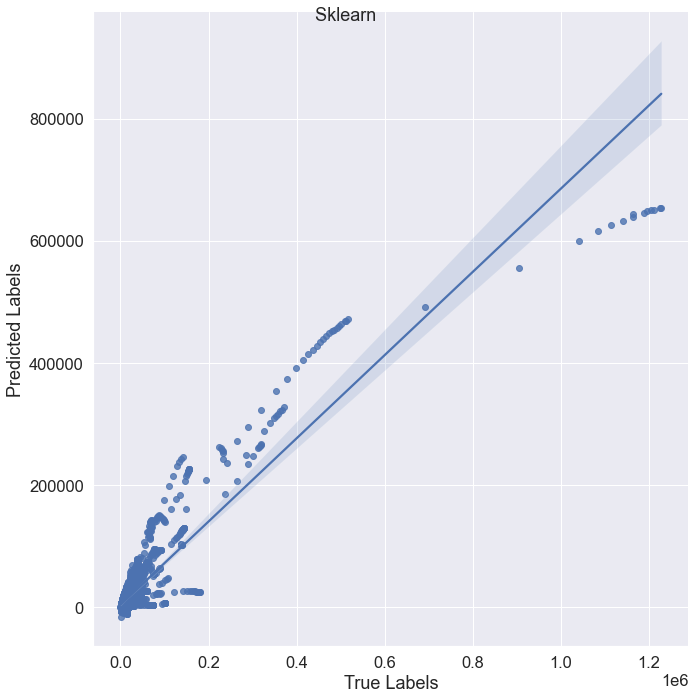

In [41]:
model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)
lmploting_(SK)